<a href="https://colab.research.google.com/github/CodeWithSridhar/Seoul-Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [66]:
data = pd.read_csv('/content/drive/MyDrive/AlmaBetter Folder/Project Supervised ML_Regression Seol bike sharing demand/SeoulBikeData.csv',sep=',',encoding='latin')

In [67]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [68]:
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [69]:
data.shape

(8760, 14)

In [70]:
data.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [72]:
data.describe(include= 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,14/03/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [73]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [74]:
data.isnull()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [75]:
# No missing values are found in the dataset

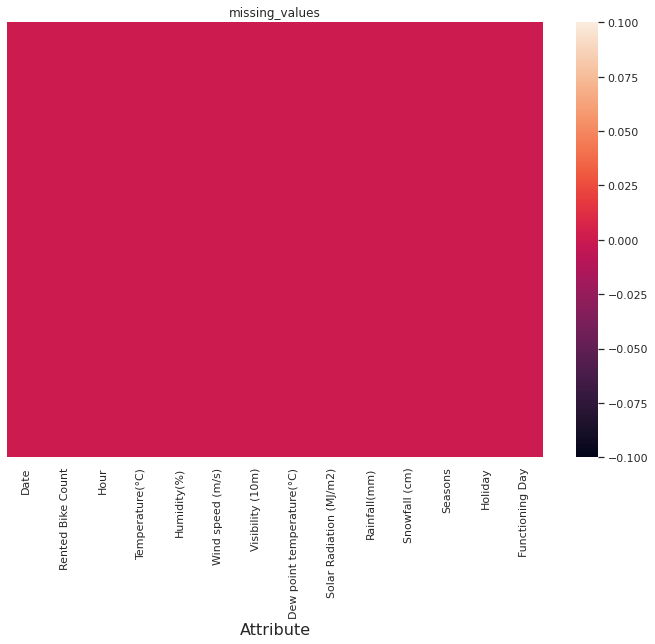

In [76]:
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), cbar=True, yticklabels= False)
plt.xlabel("Attribute", size= 16)
plt.title('missing_values')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


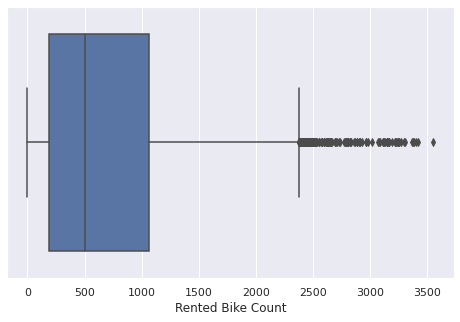

In [77]:
sns.boxplot(data['Rented Bike Count'])

In [78]:
# Exploring numerical values

In [79]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

# numerical features

In [80]:
numerical_features = ['Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)']

In [81]:
rgb_values = sns.color_palette("Paired", 9)  # List color palettes
color_map = dict(zip(numerical_features, rgb_values))   # Color Map continents

In [82]:
rgb_values


[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098)]

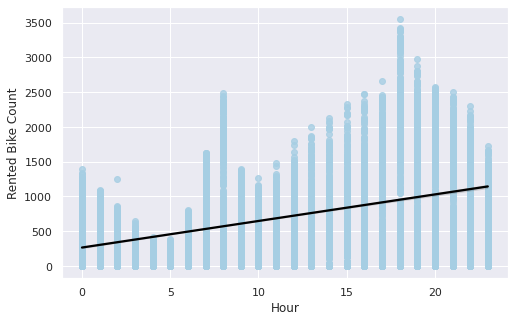

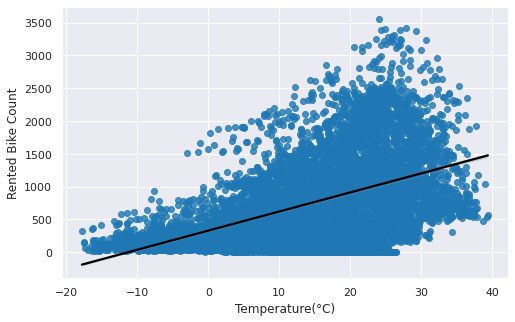

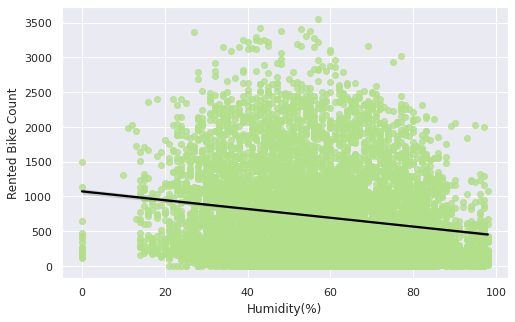

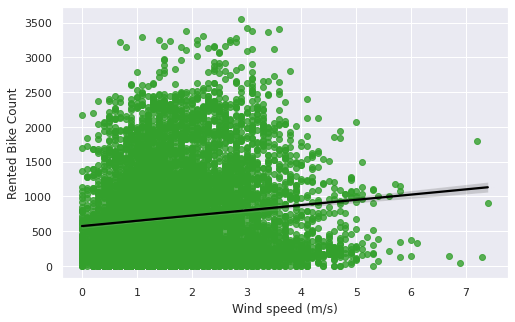

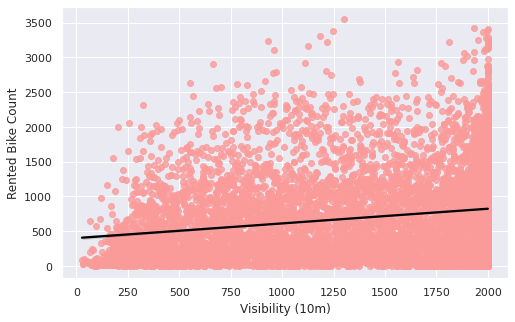

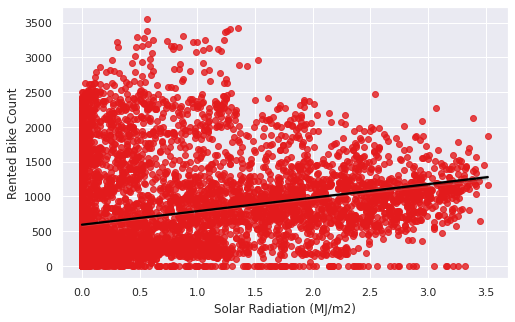

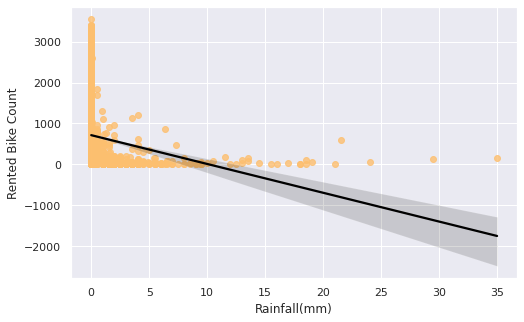

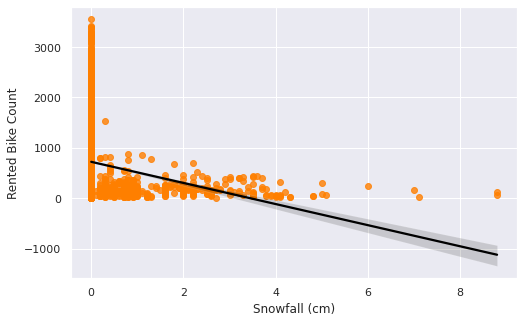

In [83]:
plt.rcParams['figure.figsize'] = (8, 5)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=data[col], y = data['Rented Bike Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "black"})

# bike renting

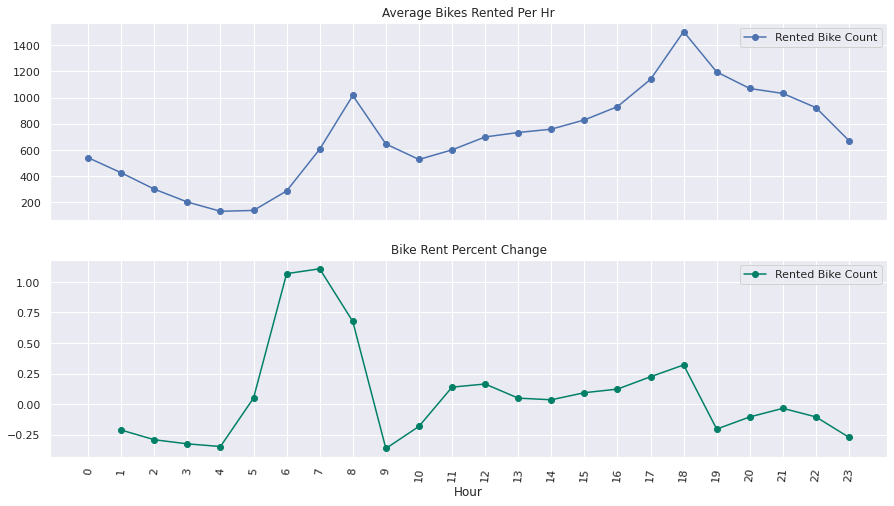

In [84]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = data.groupby('Hour')['Rented Bike Count'].mean()
pct_rent_hrs = data.groupby('Hour')['Rented Bike Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))


#Categorical Values

In [85]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [86]:
Holiday_rent = pd.DataFrame(data.groupby('Holiday').agg({'Rented Bike Count':'mean'}))
Season_rent = pd.DataFrame(data.groupby('Seasons').agg({'Rented Bike Count':'mean'}))

In [87]:
#bike rents in holidays

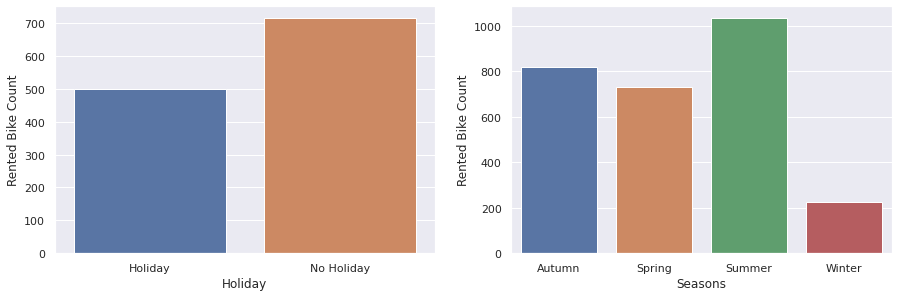

In [88]:
fig, ax = plt.subplots(1,1,figsize=(15,10))
ax1=plt.subplot(2, 2,1)
sns.barplot(x=Holiday_rent.index, y = Holiday_rent['Rented Bike Count'])
ax1=plt.subplot(2, 2,2)
sns.barplot(x=Season_rent.index, y = Season_rent['Rented Bike Count'])

Text(0, 0.5, 'Counts')

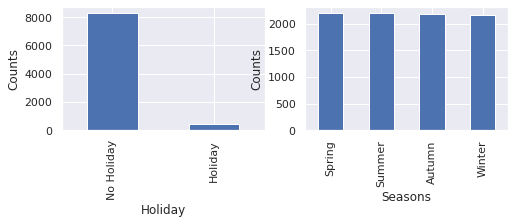

In [89]:
ax1=plt.subplot(2,2,3)
data['Holiday'].value_counts().plot(kind='bar')
plt.xlabel('Holiday')
plt.ylabel('Counts')
ax1=plt.subplot(2, 2,4)
data['Seasons'].value_counts().plot(kind='bar')
plt.xlabel('Seasons')
plt.ylabel('Counts')

# total seasonss and holidayss

In [90]:
data.Seasons.unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [91]:
data.Holiday.unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [92]:
data.Hour.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [93]:
data = data[data['Functioning Day'] == 'Yes']
data.drop('Functioning Day', axis = 1, inplace =True)


In [94]:
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


Assigining categorical value

In [95]:
def Functioning_Day(row):
  if str(row) == 'Yes':
    return 1
  else :
    return 0

In [96]:
def Holiday_label(row):
  if str(row) == 'Holiday':
    return 1
  else :
    return 0

In [97]:
data['Holiday']= data.apply(lambda row : Holiday_label(row['Holiday']),axis=1)

data['Holiday'].value_counts()

0    8057
1     408
Name: Holiday, dtype: int64

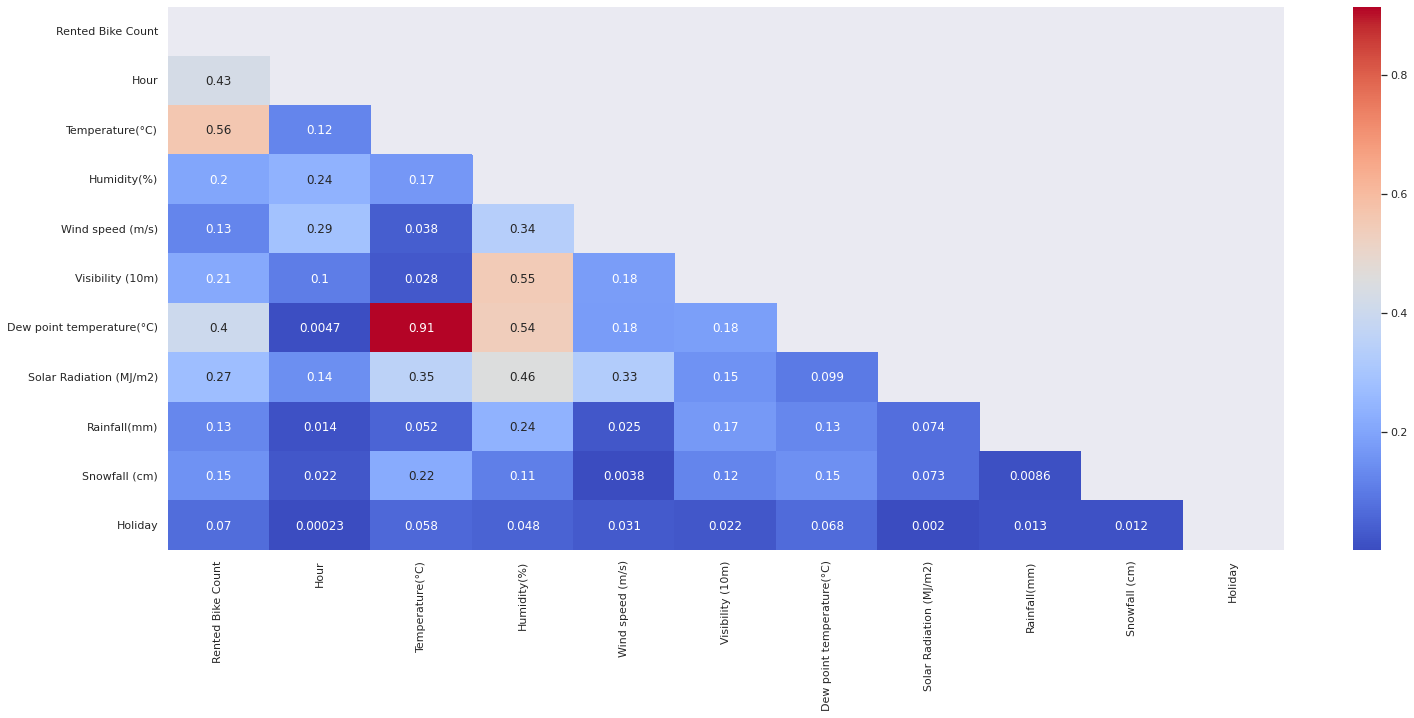

In [98]:
plt.figure(figsize=(25,10))
cor=data.corr().abs()
mask = np.triu(np.ones_like(cor, dtype=bool))
sns.heatmap(cor,mask=mask, annot=True, cmap='coolwarm')

In [99]:
data.Seasons

0       Winter
1       Winter
2       Winter
3       Winter
4       Winter
         ...  
8755    Autumn
8756    Autumn
8757    Autumn
8758    Autumn
8759    Autumn
Name: Seasons, Length: 8465, dtype: object

In [100]:
def Seasons_label(row):
  if str(row) == 'Winter':
    return 0
  elif str(row) == 'Autumn':
    return 1
  elif str(row) == 'Spring':
    return 2
  elif  str(row) == 'Summer':
    return 3

In [101]:
data['Seasons']=data.apply(lambda row : Seasons_label(row['Seasons']),axis=1)

data['Seasons'].value_counts()

3    2208
2    2160
0    2160
1    1937
Name: Seasons, dtype: int64

In [102]:
def Function_day(row):
  if str(row) == 'Yes':
    return 1
  else :
    return 0

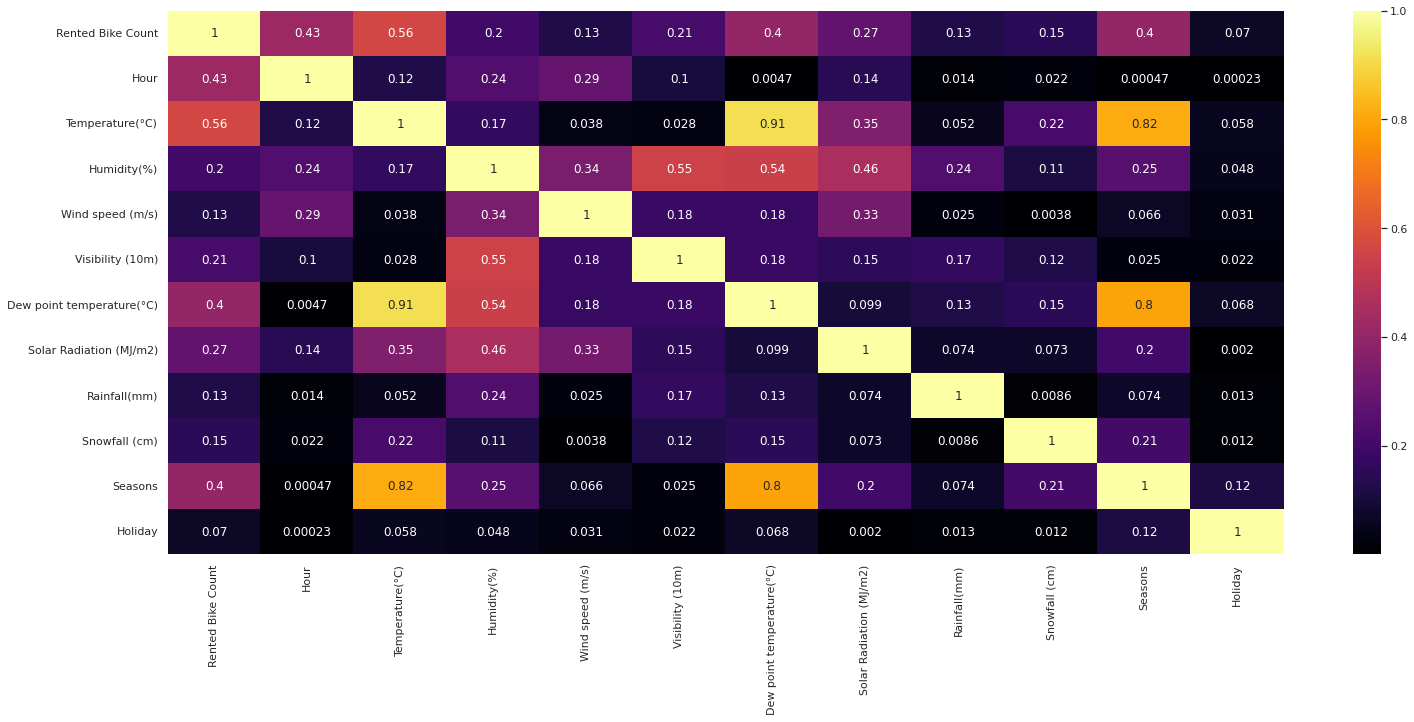

In [103]:
plt.figure(figsize=(25,10))
sns.heatmap(data.corr().abs(),annot=True,cmap='inferno')

Outliers

In [104]:
data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday'],
      dtype='object')

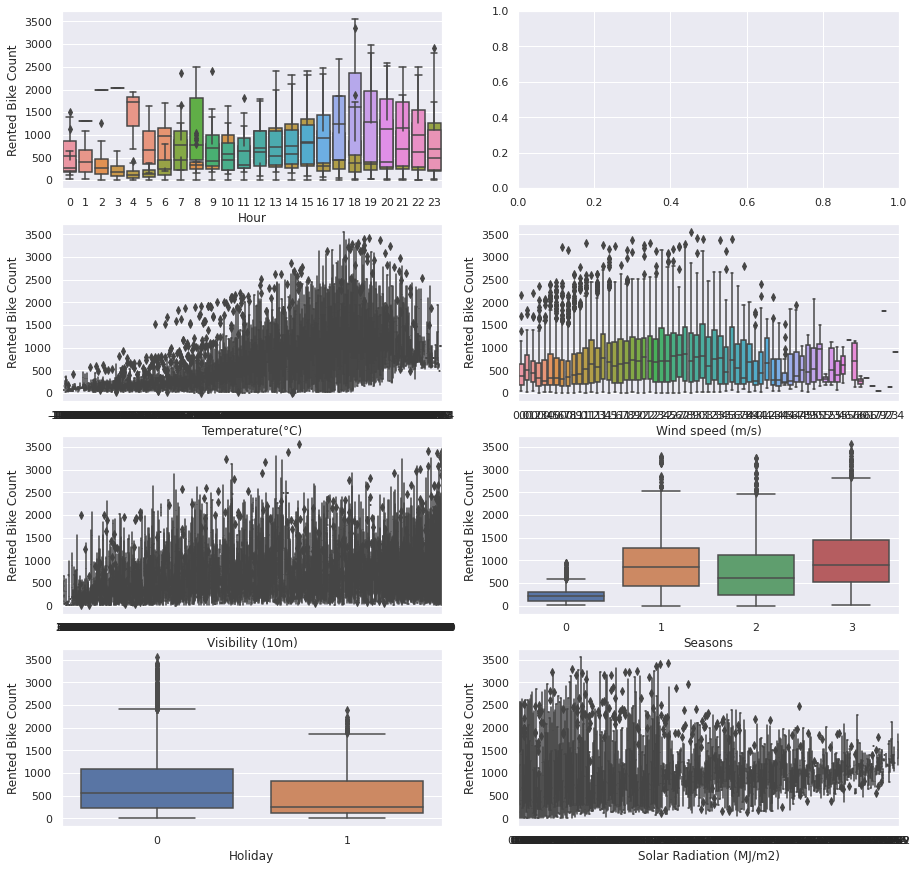

In [109]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)
sns.boxplot(data=data,y="Rented Bike Count",x="Humidity(%)",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="Rented Bike Count",x="Hour",orient="v",ax=axes[0][0])
sns.boxplot(data=data,y="Rented Bike Count",x="Temperature(°C)",orient="v",ax=axes[1][0])
sns.boxplot(data=data,y="Rented Bike Count",x="Wind speed (m/s)",orient="v",ax=axes[1][1])
sns.boxplot(data=data,y="Rented Bike Count",x="Visibility (10m)",orient="v",ax=axes[2][0])
sns.boxplot(data=data,y="Rented Bike Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=data,y="Rented Bike Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=data,y="Rented Bike Count",x="Solar Radiation (MJ/m2)",orient="v",ax=axes[3][1])

independent variable data

In [110]:
data = data.drop(labels='Date',axis=1)
data = data.drop(labels='Dew point temperature(°C)',axis=1,)

In [112]:
X = data.drop(labels='Rented Bike Count',axis=1)

In [114]:
Y = data['Rented Bike Count']

# Linear Reg

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge

In [115]:
# Spliting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [116]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((6348, 10), (2117, 10), (6348,), (2117,))

In [119]:
print(regressor.intercept_)
print(regressor.coef_)

449.33004053728746
[ 2.82772556e+01  3.33357396e+01 -7.57490553e+00  6.55798124e+00
  2.73253606e-02 -8.56811366e+01 -6.43327747e+01  1.83131441e+01
 -9.89525856e+00 -1.27441560e+02]


In [120]:
y_pred_train=regressor.predict(X_train)
y_pred=regressor.predict(X_test)

# Evaluation Matrix

In [121]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

In [122]:
r2_score(Y_test, y_pred)

0.5073055437091121

In [123]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.5049660638596776


In [124]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 198793.5341180045
RMSE : 445.8626852720515


In [125]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 198793.5341180045
RMSE : 445.8626852720515


Text(0, 0.5, 'Predicted')

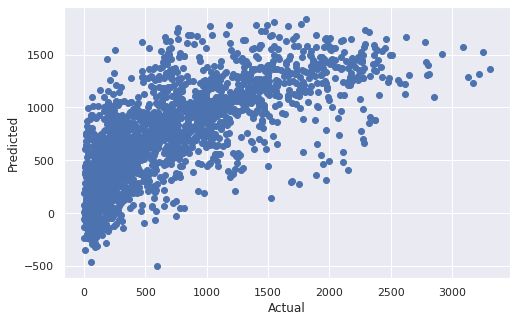

In [126]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

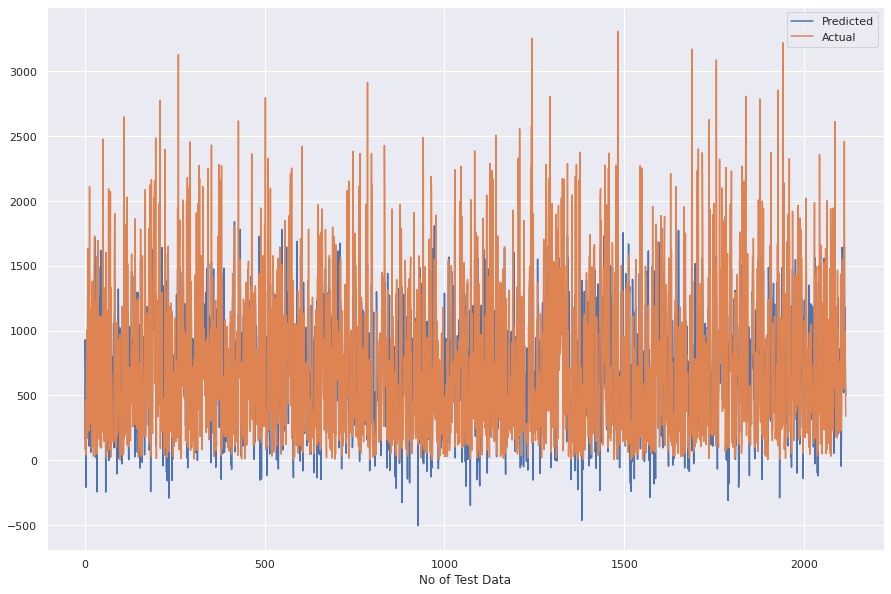

In [127]:
plt.figure(figsize=(15,10))
plt.plot(y_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# Lasso Regression

In [128]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, Y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [134]:
y_pred=lasso.predict(X_test)


In [135]:
r2_score(Y_test, y_pred)


0.5073052224328767

In [132]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 198793.663747306
RMSE : 445.86283064111325


In [133]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 333.68926336070683


Ridge Reg

In [142]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV
ridge = Ridge(alpha=30)
ridge.fit(X_train,Y_train)

Ridge(alpha=30, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [143]:
y_pred=ridge.predict(X_test)

In [144]:
r2_score(Y_test, y_pred)

0.5070654634720594

In [146]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 198890.40226455292
RMSE : 445.97130206388044


In [147]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 333.76785647648927


 # decision tree

In [148]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()

In [149]:
tree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [150]:
y_pred=tree.predict(X_test)

In [151]:
r2_score(Y_test, y_pred)

0.7386585247785817

In [152]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.7374175870994677


In [153]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 105446.68162494096
RMSE : 324.72554815557857


In [154]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 187.76145488899385


Text(0, 0.5, 'Predicted')

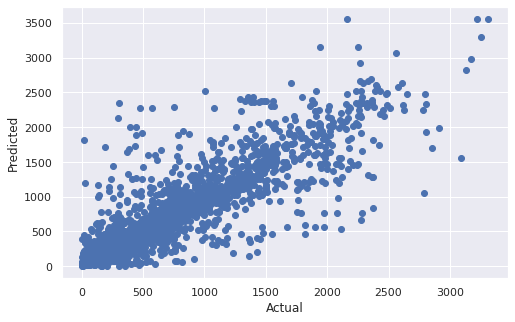

In [155]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

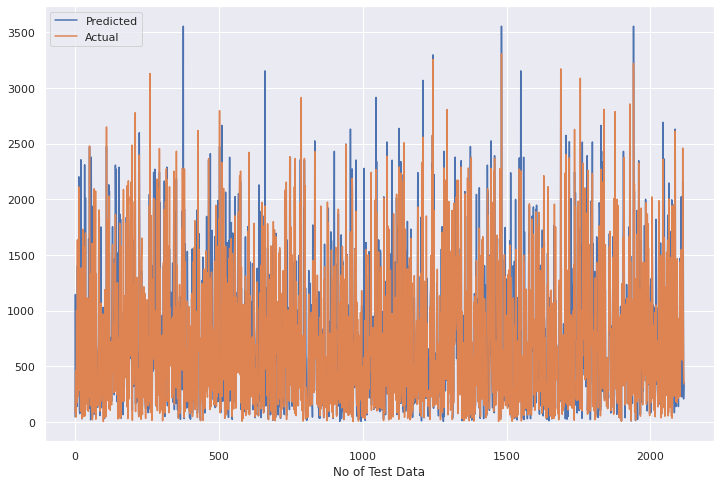

In [156]:
plt.figure(figsize=(12,8))
plt.plot(y_pred)
plt.plot(np.array(Y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

In [157]:
tree.feature_importances_

array([0.31854451, 0.35633993, 0.12044969, 0.02067163, 0.01812142,
       0.101147  , 0.01851551, 0.00114155, 0.04239143, 0.00267733])

In [158]:
features = X.columns
importances = tree.feature_importances_
indices = np.argsort(importances)

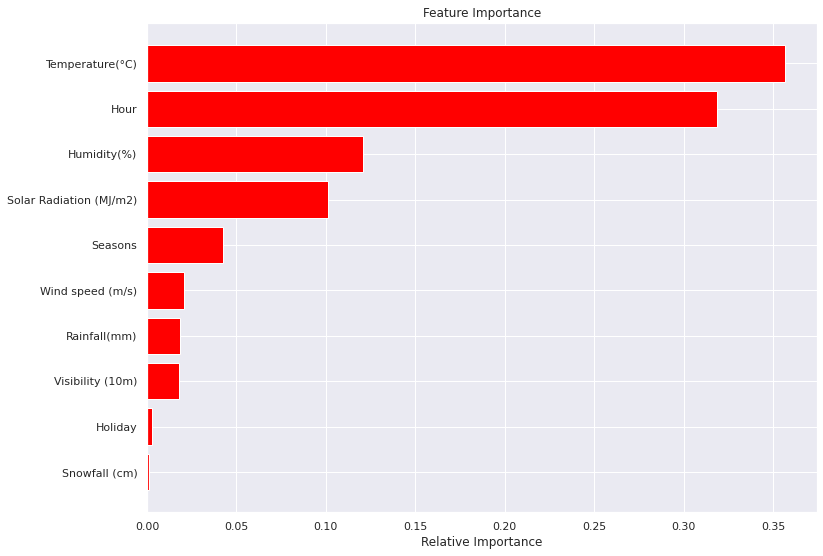

In [159]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# gradient boost

In [160]:
from sklearn.ensemble import GradientBoostingRegressor
ensemble = GradientBoostingRegressor()

In [161]:
ensemble.fit(X_train,Y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [162]:
y_pred=ensemble.predict(X_test)

In [163]:
r2_score(Y_test, y_pred)

0.8316064346851183

In [164]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.8308068451062252


In [165]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 67943.83728951948
RMSE : 260.6603868820874


In [166]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 174.1055553264373


Text(0, 0.5, 'Predicted')

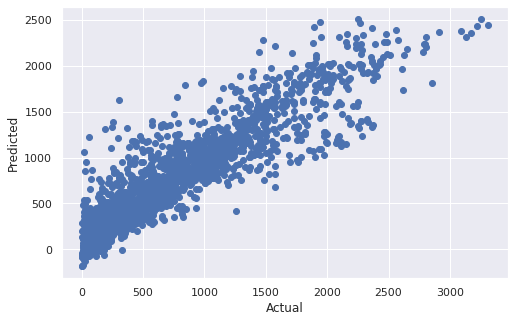

In [167]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# random forest

In [168]:
from sklearn.ensemble import RandomForestRegressor
ensemble_regressior = RandomForestRegressor()

In [169]:
ensemble_regressior.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [170]:
y_pred=ensemble_regressior.predict(X_test)

In [171]:
r2_score(Y_test, y_pred)

0.8504257832746074

In [172]:
print("Adjusted R2 : ",1-(1-r2_score((Y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Adjusted R2 :  0.849715554325294


In [173]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 60350.56164345773
RMSE : 245.6635130487589


In [174]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 150.40483703353803


Text(0, 0.5, 'Predicted')

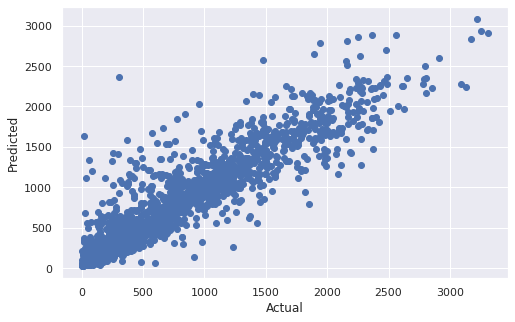

In [175]:
plt.scatter(Y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

XG boost

In [176]:
import xgboost as xgb

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.33, random_state=42)
dreg= xgb.XGBRegressor(
                        booster= 'gbtree',
                        colsample_bylevel= 1,
                        colsample_bynode= 1,
                        colsample_bytree= 0.7,
                        eta= 0.004,
                        gamma= 0,
                        importance_type= 'gain',
                        learning_rate= 0.1,
                        max_delta_step= 0,
                        max_depth= 9,
                        min_child_weight= 10,
                        n_estimators= 100,
                        n_jobs= 1,
                        objective= 'reg:linear',
                        random_state= 0,
                        reg_alpha= 0,
                        reg_lambda= 1,
                        scale_pos_weight= 1,
                        subsample= 1,
                        verbosity= 1)
dreg.fit(X_train, Y_train)
y_pred = dreg.predict(X_test)
#Find R-squared value
r2 = r2_score(Y_test, y_pred)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
train_score = dreg.score(X_train, Y_train)
test_score = dreg.score(X_test,Y_test)
print(f'Train score: {train_score}')
print(f'Test score: {test_score}')
r2

[21:47:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Train score: 0.9669850295574288
Test score: 0.8662260483087465


0.8662260483087465

In [177]:
r2

0.8662260483087465

In [178]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 54287.031544213925
RMSE : 232.9957758076612


In [179]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 143.48340080681663


Cat boost

In [181]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 28 kB/s 


In [182]:
from catboost import CatBoostRegressor
import timeit

from sklearn.datasets import make_regression

In [183]:
model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.03
  )

In [184]:
model.fit(
      X_train, Y_train,
      eval_set=(X_test, Y_test),
      verbose=10);   

0:	learn: 631.5916137	test: 624.0208755	best: 624.0208755 (0)	total: 49.5ms	remaining: 4.9s
10:	learn: 528.0301750	test: 520.7406579	best: 520.7406579 (10)	total: 73.4ms	remaining: 594ms
20:	learn: 455.0097540	test: 448.0552316	best: 448.0552316 (20)	total: 99.3ms	remaining: 373ms
30:	learn: 403.2104051	test: 396.9966781	best: 396.9966781 (30)	total: 122ms	remaining: 272ms
40:	learn: 365.9420642	test: 360.2023266	best: 360.2023266 (40)	total: 144ms	remaining: 208ms
50:	learn: 338.5169147	test: 334.2317422	best: 334.2317422 (50)	total: 167ms	remaining: 160ms
60:	learn: 320.1525756	test: 316.5654578	best: 316.5654578 (60)	total: 189ms	remaining: 121ms
70:	learn: 305.1875732	test: 302.5257141	best: 302.5257141 (70)	total: 212ms	remaining: 86.6ms
80:	learn: 294.1659226	test: 292.0153816	best: 292.0153816 (80)	total: 236ms	remaining: 55.2ms
90:	learn: 284.8812130	test: 283.4881271	best: 283.4881271 (90)	total: 261ms	remaining: 25.9ms
99:	learn: 278.0065496	test: 277.2139971	best: 277.213997

In [185]:
def train_on_cpu():  
  model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.03
  )
  
  model.fit(
      X_train, Y_train,
      eval_set=(X_test, Y_test),
      verbose=10
  );   
      
cpu_time = timeit.timeit('train_on_cpu()', 
                         setup="from __main__ import train_on_cpu", 
                         number=1)

print('Time to fit model on CPU: {} sec'.format(int(cpu_time)))

0:	learn: 631.5916137	test: 624.0208755	best: 624.0208755 (0)	total: 3.34ms	remaining: 331ms
10:	learn: 528.0301750	test: 520.7406579	best: 520.7406579 (10)	total: 24.9ms	remaining: 202ms
20:	learn: 455.0097540	test: 448.0552316	best: 448.0552316 (20)	total: 47.5ms	remaining: 179ms
30:	learn: 403.2104051	test: 396.9966781	best: 396.9966781 (30)	total: 69.9ms	remaining: 155ms
40:	learn: 365.9420642	test: 360.2023266	best: 360.2023266 (40)	total: 92.2ms	remaining: 133ms
50:	learn: 338.5169147	test: 334.2317422	best: 334.2317422 (50)	total: 115ms	remaining: 110ms
60:	learn: 320.1525756	test: 316.5654578	best: 316.5654578 (60)	total: 139ms	remaining: 88.7ms
70:	learn: 305.1875732	test: 302.5257141	best: 302.5257141 (70)	total: 161ms	remaining: 65.8ms
80:	learn: 294.1659226	test: 292.0153816	best: 292.0153816 (80)	total: 183ms	remaining: 42.8ms
90:	learn: 284.8812130	test: 283.4881271	best: 283.4881271 (90)	total: 214ms	remaining: 21.2ms
99:	learn: 278.0065496	test: 277.2139971	best: 277.21

In [186]:
# Predicting the Test set results
y_pred = model.predict(X_test)

In [187]:
import math
math.sqrt(mean_squared_error(Y_test, y_pred))

277.2139971320696

In [188]:
r2_score(Y_test, y_pred)

0.8106323579478576

In [189]:
adj_r2

0.8657453657658387

In [190]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 76847.60020593909
RMSE : 277.2139971320696


In [191]:
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MAE : 192.4843791565666


In [192]:
# Validating Assumptions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [193]:
from sklearn.metrics import mean_absolute_error
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [194]:
# Evaluation of training Data
print_metrics(Y_train, y_train_pred)

MSE is 77287.64163720791
RMSE is 278.0065496300544
RMSE is 0.8141411569704782
MAE is 195.13166380692934
MAPE is 89.5093241100718


In [195]:
# Test dataset metrics
print_metrics(Y_test, y_test_pred)

MSE is 76847.60020593909
RMSE is 277.2139971320696
RMSE is 0.8106323579478576
MAE is 192.4843791565666
MAPE is 82.15351168777153


# grid search cv

In [196]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [197]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [198]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, Y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[21:53:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[21:53:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21:53:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   50.4s finished


[21:54:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [199]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [200]:
reg_optimal_model =reg_gs.best_estimator_

In [201]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [202]:
reg_optimal_model.score(X_test,Y_test)

0.9447339650042254

# for train data

In [203]:
#Find R-squared value
r2 = r2_score(Y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [204]:
r2

0.9447339650042254

In [205]:
adj_r2

0.9445353806168888

# for train data

In [206]:
#Find R-squared value
r2 = r2_score(Y_train, train_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_train, train_preds))*((X_train.shape[0]-1)/(X_train.shape[0]-X_test.shape[1]-1))

In [207]:
r2

0.9485426027944392

In [208]:
adj_r2

0.9484516886651008

# principal component analysis

In [209]:
# import libraries for PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
# X = df.drop('MEDV',axis=1)
X_pca = pca.fit_transform(X)

In [210]:
print(pca.components_)

[[-1.18153753e-03 -5.59596564e-04  1.84611219e-02 -3.06604467e-04
  -9.99828599e-01 -2.18479636e-04  3.14923571e-04  8.95836866e-05
   4.58745002e-05 -7.81710901e-06]
 [ 8.33484125e-02 -2.63955751e-01 -9.60011368e-01  1.67888430e-02
  -1.76904292e-02  1.77698494e-02 -1.09468539e-02 -2.22004993e-04
  -2.69764325e-02  6.18464483e-04]
 [ 1.75779308e-01  9.49682398e-01 -2.46810716e-01  7.85664204e-03
  -5.30502966e-03  3.86761950e-02 -2.27616638e-04 -8.75922136e-03
   6.80171585e-02 -7.87782427e-04]
 [ 9.80127499e-01 -1.46635537e-01  1.26154097e-01  3.19024579e-02
   1.25012311e-03 -1.46935937e-02  1.32003516e-02  4.53682891e-03
  -2.24317823e-02 -7.44074035e-06]
 [-1.74296932e-02 -4.09252963e-03 -7.65691228e-03  1.85185111e-01
   1.19674311e-04  6.47221273e-02  9.80180878e-01 -5.56436118e-03
   1.87828819e-02  1.54052880e-04]
 [ 2.77500231e-02  9.37309922e-03 -2.32676313e-02 -9.39140374e-01
  -6.10039551e-05 -2.76808750e-01  1.96361176e-01 -2.89034911e-02
  -2.42464358e-02 -3.45784200e-03

In [211]:
print(pca.explained_variance_)

[3.71070493e+05 3.08269408e+02 1.37489840e+02 4.26688625e+01
 1.19646116e+00 9.34367180e-01 4.27018283e-01]


In [212]:
df_pca = pd.DataFrame(X_pca,columns=['F1','F2','F3','F4','F5','F6','F7'])
df_pca['Rented_Bike_Count'] = SeoulBikeData['Rented_Bike_Count']

NameError: ignored

In [ ]:
df_pca.head()

In [ ]:
df_pca.corr().abs()

In [213]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [214]:
calc_vif(df_pca[[feature for feature in df_pca.describe().columns if feature not in ['Rented_Bike_Count']]])

,variables,VIF
0,F1,1.0
1,F2,1.0
2,F3,1.0
3,F4,1.0
4,F5,1.0
5,F6,1.0
6,F7,1.0


<Figure size 1152x1728 with 0 Axes>

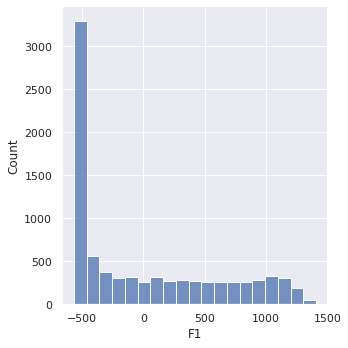

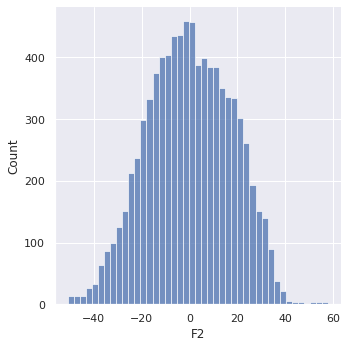

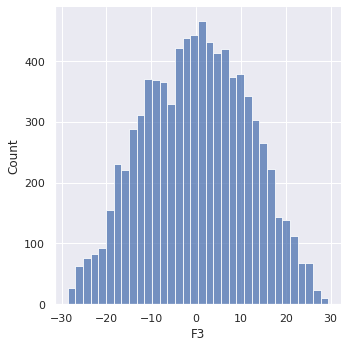

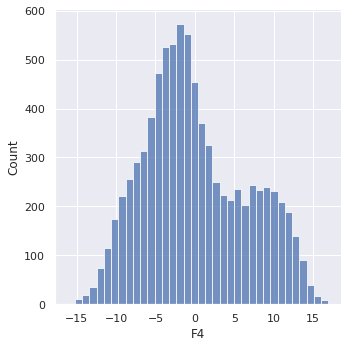

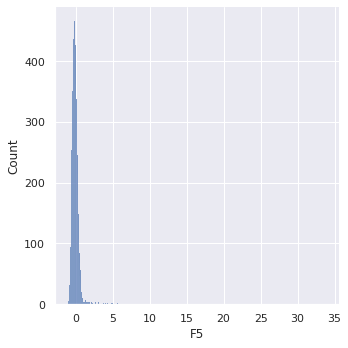

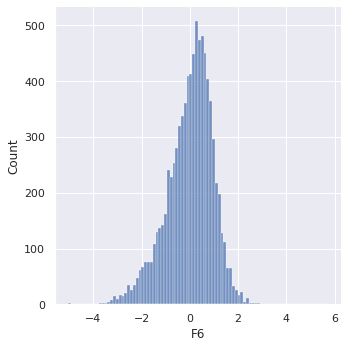

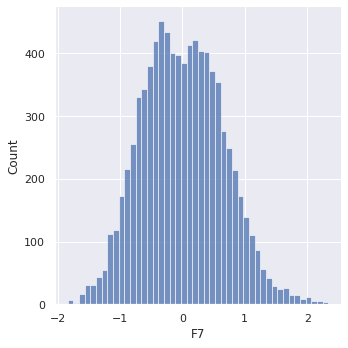

In [215]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_pca.columns:
    pos = pos + 1
    sns.displot(df_pca[i])

In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error

In [217]:
X_train,X_test,Y_train,Y_test = train_test_split(X , Y, test_size=0.20)


print("Shape of Train data set is",X_train.shape,Y_train.shape)
print("Shape of X_test is ",X_test.shape,Y_test.shape)

Shape of Train data set is (6772, 10) (6772,)
Shape of X_test is  (1693, 10) (1693,)


In [218]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-7,1e-3,1e-2,1e-1,1,5,10,20,100]}
regressor = GridSearchCV(lasso, parameters, cv=8)
regressor.fit(X_train, Y_train)

GridSearchCV(cv=8, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-07, 0.001, 0.01, 0.1, 1, 5, 10, 20, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [219]:
optimal=regressor.best_estimator_

In [220]:
y_pred=optimal.predict(X_test)
y_pred_train=optimal.predict(X_train)

In [221]:
MSE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 203545.8431656527
RMSE : 451.16055142892617


In [222]:
#Train datset
r2 = r2_score(Y_train, y_pred_train)
print("R2 :" ,r2)

R2 : 0.516442815412496


In [223]:
#test dataset
r2 = r2_score(Y_test, y_pred)
print("R2 :" ,r2)

R2 : 0.5075383740169946


# grid search cv on XG

In [224]:
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)

In [225]:
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

In [226]:
reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X, Y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[22:03:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[22:03:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:03:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:   51.1s finished


[22:04:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=3, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
 

In [227]:
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 9,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [228]:
reg_optimal_model =reg_gs.best_estimator_

In [229]:
train_preds = reg_optimal_model.predict(X_train)
test_preds = reg_optimal_model.predict(X_test)

In [230]:
reg_optimal_model.score(X_test,Y_test)

0.9470962584919597

In [231]:
##For Train dataset:

#Find R-squared value
r2 = r2_score(Y_test, test_preds)
# Find Adjusted R-squared value
adj_r2=1-(1-r2_score(Y_test, test_preds))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

In [232]:
r2

0.9470962584919598

In [233]:
adj_r2

0.9467817297077264

In [234]:
SE  = mean_squared_error(Y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)
MAE  = mean_absolute_error(Y_test, y_pred)
print("MAE :" , MAE)

MSE : 203545.8431656527
RMSE : 451.16055142892617
MAE : 336.55521473202816


 conclusion: Accuracy of 94%